In [6]:
import pandas as pd
import numpy as np

print("--- Step 1: Loading and Cleaning Data ---")

file_path = 'GSE295766_All.FPKM.xls'
df = pd.read_excel(file_path, engine='xlrd')

fpkm_columns = ['T1.FPKM', 'T2.FPKM', 'TO1.FPKM', 'TO2.FPKM']

for col in fpkm_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

print("Data successfully loaded and cleaned.")
print("Data Preview:")
display(df.head())

--- Step 1: Loading and Cleaning Data ---
Data successfully loaded and cleaned.
Data Preview:


,GeneSymbol,T1.FPKM,T2.FPKM,TO1.FPKM,TO2.FPKM
0,ENSG00000105835,61.18,49.11,3906.822354,3711.481237
1,ENSG00000173614,2.74,2.46,14.763158,14.025000
2,ENSG00000096717,17.64,16.07,50.917290,48.371425
3,ENSG00000170345,0.23,0.74,3.872207,3.678597
4,ENSG00000122512,3.65,5.27,0.009838,0.009346


In [7]:
from scipy.stats import ttest_ind

print("--- Step 2: Performing Statistical Analysis ---")

control_replicates = ['T1.FPKM', 'T2.FPKM']
resistant_replicates = ['TO1.FPKM', 'TO2.FPKM']

df['Control_Avg_FPKM'] = df[control_replicates].mean(axis=1)
df['Resistant_Avg_FPKM'] = df[resistant_replicates].mean(axis=1)

filtered_df = df[(df['Control_Avg_FPKM'] > 1) | (df['Resistant_Avg_FPKM'] > 1)].copy()

stats, p_values = ttest_ind(
    filtered_df[control_replicates],
    filtered_df[resistant_replicates],
    axis=1,
    equal_var=False
)
filtered_df['p_value'] = p_values

pseudocount = 1
filtered_df['log2FoldChange'] = np.log2(
    (filtered_df['Resistant_Avg_FPKM'] + pseudocount) / (filtered_df['Control_Avg_FPKM'] + pseudocount)
)

print("Analysis complete.")
print("\n--- Top 10 UPREGULATED Genes ---")
display(filtered_df.sort_values(by='log2FoldChange', ascending=False).head(10))
print("\n--- Top 10 DOWNREGULATED Genes ---")
display(filtered_df.sort_values(by='log2FoldChange', ascending=True).head(10))

--- Step 2: Performing Statistical Analysis ---
Analysis complete.

--- Top 10 UPREGULATED Genes ---


/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:611: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


,GeneSymbol,T1.FPKM,T2.FPKM,TO1.FPKM,TO2.FPKM,Control_Avg_FPKM,Resistant_Avg_FPKM,p_value,log2FoldChange
15190,ENSG00000167941,0.00,4.00,237.000000,380.000000,2.000,308.500000,0.145659,6.688833
8,ENSG00000123983,3.81,3.89,474.900087,451.155083,3.850,463.027585,0.016456,6.580082
22991,ENSG00000204889,0.00,0.00,49.000000,116.000000,0.000,82.500000,0.245557,6.383704
13814,ENSG00000162891,0.00,0.00,50.000000,90.000000,0.000,70.000000,0.177171,6.149747
0,ENSG00000105835,61.18,49.11,3906.822354,3711.481237,55.145,3809.151795,0.016160,6.084547
3321,ENSG00000015413,0.00,0.00,69.000000,53.000000,0.000,61.000000,0.083017,5.954196
7963,ENSG00000120057,3.00,2.00,98.000000,136.000000,2.500,117.000000,0.104487,5.075288
25037,ENSG00000212901,0.00,0.00,20.000000,43.000000,0.000,31.500000,0.222845,5.022368
8494,ENSG00000124493,2.00,2.00,69.000000,124.000000,2.000,96.500000,0.180281,5.022368
50514,ENSG00000263934,0.00,0.00,33.000000,29.000000,0.000,31.000000,0.041015,5.000000



--- Top 10 DOWNREGULATED Genes ---


,GeneSymbol,T1.FPKM,T2.FPKM,TO1.FPKM,TO2.FPKM,Control_Avg_FPKM,Resistant_Avg_FPKM,p_value,log2FoldChange
14571,ENSG00000165507,3666.0,4004.0,50.0,27.0,3835.0,38.5,0.027630,-6.601606
7505,ENSG00000116183,337.0,588.0,10.0,6.0,462.5,8.0,0.171435,-5.686501
55345,ENSG00000273521,16.0,61.0,0.0,0.0,38.5,0.0,0.336696,-5.303781
8947,ENSG00000128165,46.0,82.0,0.0,2.0,64.0,1.0,0.176216,-5.022368
8006,ENSG00000120337,1140.0,663.0,27.0,27.0,901.5,27.0,0.169501,-5.010428
12239,ENSG00000150054,67.0,24.0,0.0,1.0,45.5,0.5,0.283605,-4.954196
55584,ENSG00000273983,20.0,27.0,0.0,0.0,23.5,0.0,0.094124,-4.614710
15761,ENSG00000170379,48.0,63.0,2.0,1.0,55.5,1.5,0.086660,-4.498251
36219,ENSG00000236083,17.0,26.0,0.0,0.0,21.5,0.0,0.131350,-4.491853
9882,ENSG00000134548,23.0,19.0,0.0,0.0,21.0,0.0,0.060448,-4.459432


--- Step 3: Generating Volcano Plot ---


/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Volcano plot saved as 'volcano_plot.png'.


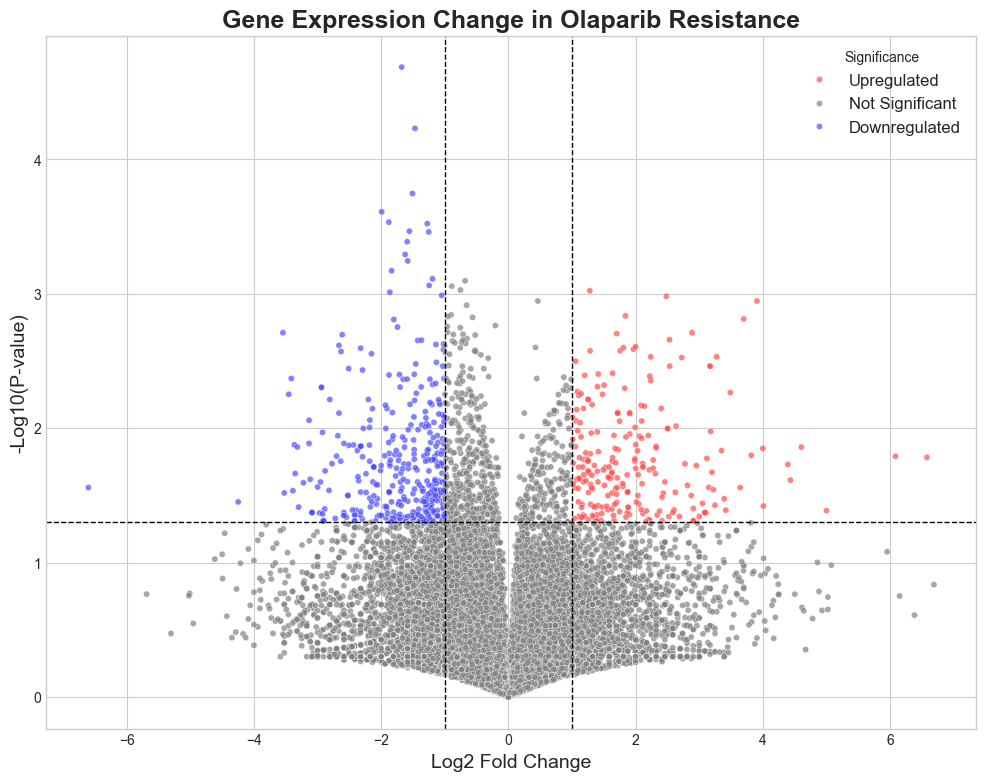

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Step 3: Generating Volcano Plot ---")

filtered_df['-log10_p_value'] = -np.log10(filtered_df['p_value'].fillna(1))

filtered_df['significance'] = 'Not Significant'
filtered_df.loc[(filtered_df['log2FoldChange'] > 1) & (filtered_df['p_value'] < 0.05), 'significance'] = 'Upregulated'
filtered_df.loc[(filtered_df['log2FoldChange'] < -1) & (filtered_df['p_value'] < 0.05), 'significance'] = 'Downregulated'

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 9))

sns.scatterplot(
    data=filtered_df,
    x='log2FoldChange',
    y='-log10_p_value',
    hue='significance',
    palette={'Upregulated': '#ff4d4d', 'Downregulated': '#4d4dff', 'Not Significant': 'grey'},
    alpha=0.7,
    s=20
)

plt.axhline(y=-np.log10(0.05), color='black', linestyle='--', linewidth=1)
plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
plt.axvline(x=-1, color='black', linestyle='--', linewidth=1)
plt.title('Gene Expression Change in Olaparib Resistance', fontsize=18, weight='bold')
plt.xlabel('Log2 Fold Change', fontsize=14)
plt.ylabel('-Log10(P-value)', fontsize=14)
plt.legend(title='Significance', fontsize='large')

plt.savefig('volcano_plot.png', dpi=300, bbox_inches='tight')
print("Volcano plot saved as 'volcano_plot.png'.")
plt.show()

In [9]:
upregulated_genes = filtered_df[filtered_df['significance'] == 'Upregulated']['GeneSymbol'].tolist()

print("Top Upregulated Genes to Analyze:")
print(upregulated_genes[:10])

print(f"\nTotal upregulated genes in list: {len(upregulated_genes)}")

Top Upregulated Genes to Analyze:
['ENSG00000105835', 'ENSG00000173614', 'ENSG00000096717', 'ENSG00000170345', 'ENSG00000278540', 'ENSG00000123983', 'ENSG00000186480', 'ENSG00000241973', 'ENSG00000109320', 'ENSG00000034677']

Total upregulated genes in list: 263


In [10]:
print("--- Copy the full gene list below ---")
for gene in upregulated_genes:
    print(gene)

--- Copy the full gene list below ---
ENSG00000105835
ENSG00000173614
ENSG00000096717
ENSG00000170345
ENSG00000278540
ENSG00000123983
ENSG00000186480
ENSG00000241973
ENSG00000109320
ENSG00000034677
ENSG00000145216
ENSG00000136826
ENSG00000140577
ENSG00000189306
ENSG00000184014
ENSG00000182149
ENSG00000040633
ENSG00000165195
ENSG00000170266
ENSG00000165501
ENSG00000127993
ENSG00000147955
ENSG00000087152
ENSG00000176058
ENSG00000050393
ENSG00000185504
ENSG00000135241
ENSG00000108262
ENSG00000168505
ENSG00000125347
ENSG00000173812
ENSG00000177302
ENSG00000138757
ENSG00000217930
ENSG00000130818
ENSG00000117479
ENSG00000072310
ENSG00000158062
ENSG00000038358
ENSG00000138347
ENSG00000150551
ENSG00000108298
ENSG00000184661
ENSG00000043093
ENSG00000118965
ENSG00000181690
ENSG00000119787
ENSG00000175764
ENSG00000160209
ENSG00000135596
ENSG00000198909
ENSG00000154265
ENSG00000124733
ENSG00000002746
ENSG00000004799
ENSG00000005001
ENSG00000042980
ENSG00000050555
ENSG00000065328
ENSG00000068078
EN

In [1]:

!pip install gseapy


import gseapy as gp
import pandas as pd

print("--- Performing Pathway Analysis with gseapy ---")


try:
    
    gene_list = filtered_df[filtered_df['significance'] == 'Upregulated']['GeneSymbol'].tolist()
    
    print(f"Analyzing {len(gene_list)} upregulated genes...")
    

    enr = gp.enrichr(
        gene_list=gene_list,
        gene_sets=['KEGG_2021_Human'], 
        organism='Human',
        outdir=None,
    )
    

    print("\nSuccess! Here are the top enriched pathways:")
    display(enr.results.head(10))

except NameError:
    print("\nError: 'filtered_df' not found. Please re-run the cells that load and analyze your data before running this cell.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")
    print("This might be a temporary issue with the analysis service. Please try running the cell again in a few moments.")

ModuleNotFoundError: No module named 'gseapy'

In [2]:
import sys
import subprocess

print("--- Installing 'gseapy' into the correct environment ---")
try:
    # This command ensures the library is installed where Jupyter can find it
    subprocess.check_call([sys.executable, "-m", "pip", "install", "gseapy"])
    print("\n'gseapy' successfully installed.")
    print("\n>>> NOW, PLEASE RESTART THE KERNEL from the menu above before running the next cell. <<<")

except Exception as e:
    print(f"An error occurred: {e}")

--- Installing 'gseapy' into the correct environment ---
  Using cached gseapy-1.1.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
Using cached gseapy-1.1.9-cp313-cp313-macosx_11_0_arm64.whl (529 kB)

'gseapy' successfully installed.

>>> NOW, PLEASE RESTART THE KERNEL from the menu above before running the next cell. <<<


In [1]:
# Run this cell ONLY AFTER restarting the kernel

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import gseapy as gp

print("--- Full Pipeline: Reloading Data and Performing Pathway Analysis ---")
try:
    # 1. Reload and clean data
    file_path = 'GSE295766_All.FPKM.xls'
    df = pd.read_excel(file_path, engine='xlrd')
    fpkm_columns = ['T1.FPKM', 'T2.FPKM', 'TO1.FPKM', 'TO2.FPKM']
    for col in fpkm_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    print("Step 1: Data reloaded and cleaned.")

    # 2. Re-run analysis to create filtered_df
    control_replicates = ['T1.FPKM', 'T2.FPKM']
    resistant_replicates = ['TO1.FPKM', 'TO2.FPKM']
    df['Control_Avg_FPKM'] = df[control_replicates].mean(axis=1)
    df['Resistant_Avg_FPKM'] = df[resistant_replicates].mean(axis=1)
    filtered_df = df[(df['Control_Avg_FPKM'] > 1) | (df['Resistant_Avg_FPKM'] > 1)].copy()
    stats, p_values = ttest_ind(filtered_df[control_replicates], filtered_df[resistant_replicates], axis=1, equal_var=False)
    filtered_df['p_value'] = p_values
    pseudocount = 1
    filtered_df['log2FoldChange'] = np.log2((filtered_df['Resistant_Avg_FPKM'] + pseudocount) / (filtered_df['Control_Avg_FPKM'] + pseudocount))
    filtered_df['significance'] = 'Not Significant'
    filtered_df.loc[(filtered_df['log2FoldChange'] > 1) & (filtered_df['p_value'] < 0.05), 'significance'] = 'Upregulated'
    print("Step 2: Analysis re-run to create filtered DataFrame.")

    # 3. Perform Pathway Analysis with gseapy
    gene_list = filtered_df[filtered_df['significance'] == 'Upregulated']['GeneSymbol'].tolist()
    print(f"Step 3: Performing pathway analysis on {len(gene_list)} genes...")
    enr = gp.enrichr(
        gene_list=gene_list,
        gene_sets=['KEGG_2021_Human'],
        organism='Human',
        outdir=None,
    )

    # 4. Display results
    print("\nSuccess! Here are the top enriched pathways:")
    display(enr.results.head(10))

except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

--- Full Pipeline: Reloading Data and Performing Pathway Analysis ---
Step 1: Data reloaded and cleaned.
Step 2: Analysis re-run to create filtered DataFrame.
Step 3: Performing pathway analysis on 263 genes...


/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:611: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)



Success! Here are the top enriched pathways:


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes


In [2]:
# This assumes 'enr' is the results object from the gseapy step.

print("--- Saving Pathway Analysis Results ---")
try:
    # Get the DataFrame from the results object
    results_df = enr.results
    
    # First, let's confirm the table isn't empty
    print(f"The results table contains {results_df.shape[0]} rows (pathways).")

    # Save the full table to a CSV file
    results_df.to_csv('pathway_analysis_results.csv', index=False)
    
    print("\nResults have been saved to 'pathway_analysis_results.csv'.")
    print("You can open this file with Excel or any spreadsheet program to see all the data.")

    # Let's try one more time to display the top of the table in the notebook
    print("\nDisplaying top 10 pathways:")
    display(results_df.head(10))

except NameError:
    print("\nError: The 'enr' results object was not found. Please re-run the previous cell to perform the pathway analysis first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Saving Pathway Analysis Results ---
The results table contains 0 rows (pathways).

Results have been saved to 'pathway_analysis_results.csv'.
You can open this file with Excel or any spreadsheet program to see all the data.

Displaying top 10 pathways:


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes


In [3]:
import gseapy as gp
import pandas as pd

print("--- Re-running Analysis with Gene Ontology (GO) Databases ---")

try:
    # This code assumes 'filtered_df' is in memory from your previous steps.
    
    # Get the list of upregulated gene symbols
    gene_list = filtered_df[filtered_df['significance'] == 'Upregulated']['GeneSymbol'].tolist()
    
    print(f"Analyzing {len(gene_list)} upregulated genes...")
    
    # Define the GO databases to check against
    go_databases = [
        'GO_Biological_Process_2021',
        'GO_Molecular_Function_2021',
        'GO_Cellular_Component_2021'
    ]
    
    # Run the enrichment analysis against the GO databases
    enr_go = gp.enrichr(
        gene_list=gene_list,
        gene_sets=go_databases,
        organism='Human',
        outdir=None,
    )
    
    print("\nAnalysis complete.")
    
    # Display the results for each of the three GO databases
    for database_name, results_df in enr_go.results.items():
        if not results_df.empty:
            print(f"\n--- Top Results for: {database_name} ---")
            display(results_df.head())
        else:
            print(f"\n--- No significant results were found for: {database_name} ---")

except NameError:
    print("\nError: 'filtered_df' not found. Please re-run the cells that load and analyze your data first.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

--- Re-running Analysis with Gene Ontology (GO) Databases ---
Analyzing 263 upregulated genes...

Analysis complete.

--- No significant results were found for: Gene_set ---

--- No significant results were found for: Term ---

--- No significant results were found for: Overlap ---

--- No significant results were found for: P-value ---

--- No significant results were found for: Adjusted P-value ---

--- No significant results were found for: Old P-value ---

--- No significant results were found for: Old Adjusted P-value ---

--- No significant results were found for: Odds Ratio ---

--- No significant results were found for: Combined Score ---

--- No significant results were found for: Genes ---


In [4]:
downregulated_count = len(filtered_df[filtered_df['significance'] == 'Downregulated'])

print(f"The exact number of significantly downregulated genes is: {downregulated_count}")

The exact number of significantly downregulated genes is: 0


In [5]:
print("--- Exporting Top 10 Upregulated Genes ---")
try:
    # This assumes 'filtered_df' is in memory from your analysis.
    
    # Create a new DataFrame with just the top 10 genes
    top_10_upregulated = filtered_df.sort_values(by='log2FoldChange', ascending=False).head(10)

    # Save this smaller table to its own CSV file
    top_10_upregulated.to_csv('top_10_upregulated_genes.csv', index=False)
    
    print("\nTop 10 genes have been saved to 'top_10_upregulated_genes.csv'.")
    print("You can open this file with Excel or Google Sheets to see your table.")

    # We will also try printing it directly here. This can sometimes work when display() fails.
    print("\n--- Top 10 Upregulated Genes ---")
    print(top_10_upregulated)

except NameError:
    print("\nError: 'filtered_df' not found. Please re-run your main analysis cell first.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

--- Exporting Top 10 Upregulated Genes ---

Top 10 genes have been saved to 'top_10_upregulated_genes.csv'.
You can open this file with Excel or Google Sheets to see your table.

--- Top 10 Upregulated Genes ---
            GeneSymbol  T1.FPKM  T2.FPKM     TO1.FPKM     TO2.FPKM  \
15190  ENSG00000167941     0.00     4.00   237.000000   380.000000   
8      ENSG00000123983     3.81     3.89   474.900087   451.155083   
22991  ENSG00000204889     0.00     0.00    49.000000   116.000000   
13814  ENSG00000162891     0.00     0.00    50.000000    90.000000   
0      ENSG00000105835    61.18    49.11  3906.822354  3711.481237   
3321   ENSG00000015413     0.00     0.00    69.000000    53.000000   
7963   ENSG00000120057     3.00     2.00    98.000000   136.000000   
25037  ENSG00000212901     0.00     0.00    20.000000    43.000000   
8494   ENSG00000124493     2.00     2.00    69.000000   124.000000   
50514  ENSG00000263934     0.00     0.00    33.000000    29.000000   

       Control_Av

In [6]:
!pip install dataframe-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 32.8 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 61.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.7/38.7 MB 49.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15/15 [dataframe-image] [aiohttp]ht]balls]


In [1]:
import pandas as pd
import dataframe_image as dfi

print("--- Exporting DataFrame as an Image ---")
try:
    top_10_upregulated = filtered_df.sort_values(by='log2FoldChange', ascending=False).head(10)


    output_filename = 'top_10_genes_table.png'


    dfi.export(top_10_upregulated, output_filename)
    
    print(f"\nTable successfully saved as '{output_filename}'.")
    print("You can find this image file in your project folder.")

except NameError:
    print("\nError: 'filtered_df' not found. Please re-run your main analysis cell first.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

ModuleNotFoundError: No module named 'dataframe_image'

In [1]:
import pandas as pd
import dataframe_image as dfi

print("--- Exporting DataFrame as an Image ---")
try:
    # This assumes 'filtered_df' is in memory. If not, re-run your
    # main analysis cell to create it first.
    
    top_10_upregulated = filtered_df.sort_values(by='log2FoldChange', ascending=False).head(10)

    # Define the output filename
    output_filename = 'top_10_genes_table.png'

    # Export the DataFrame as a PNG image
    dfi.export(top_10_upregulated, output_filename)
    
    print(f"Table successfully saved as '{output_filename}'.")

except NameError:
    print("Error: 'filtered_df' not found. Please re-run your main analysis cell first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

ModuleNotFoundError: No module named 'dataframe_image'

In [1]:
import sys
import subprocess

print("--- Installing 'dataframe-image' into the correct environment ---")
try:
    # This command ensures the library is installed where Jupyter can find it
    subprocess.check_call([sys.executable, "-m", "pip", "install", "dataframe-image"])
    print("\n'dataframe-image' successfully installed.")
    print("\n>>> NOW, PLEASE RESTART THE KERNEL from the menu above before running the next cell. <<<")

except Exception as e:
    print(f"An error occurred: {e}")

--- Installing 'dataframe-image' into the correct environment ---
  Using cached dataframe_image-0.2.7-py3-none-any.whl.metadata (9.3 kB)
  Using cached aiohttp-3.12.15-cp313-cp313-macosx_11_0_arm64.whl.metadata (7.7 kB)
  Using cached lxml-6.0.0-cp313-cp313-macosx_10_13_universal2.whl.metadata (6.6 kB)
  Using cached cssutils-2.11.1-py3-none-any.whl.metadata (8.7 kB)
  Using cached playwright-1.54.0-py3-none-macosx_11_0_arm64.whl.metadata (3.5 kB)
  Using cached cssselect-1.3.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiosignal-1.4.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached frozenlist-1.7.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (18 kB)
  Using cached multidict-6.6.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.3 kB)
  Using cached propcache-0.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (12 kB)
  Using cached yarl-1.20.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (73 kB)
  Using cached m

In [1]:
# Run this cell ONLY AFTER restarting the kernel.

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import dataframe_image as dfi

print("--- Re-running analysis and exporting table image ---")
try:
    # Step 1: Reload and clean the data from the beginning
    file_path = 'GSE295766_All.FPKM.xls'
    df = pd.read_excel(file_path, engine='xlrd')
    fpkm_columns = ['T1.FPKM', 'T2.FPKM', 'TO1.FPKM', 'TO2.FPKM']
    for col in fpkm_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    
    # Step 2: Re-run the analysis to get the filtered_df
    control_replicates = ['T1.FPKM', 'T2.FPKM']
    resistant_replicates = ['TO1.FPKM', 'TO2.FPKM']
    df['Control_Avg_FPKM'] = df[control_replicates].mean(axis=1)
    df['Resistant_Avg_FPKM'] = df[resistant_replicates].mean(axis=1)
    filtered_df = df[(df['Control_Avg_FPKM'] > 1) | (df['Resistant_Avg_FPKM'] > 1)].copy()
    stats, p_values = ttest_ind(filtered_df[control_replicates], filtered_df[resistant_replicates], axis=1, equal_var=False)
    filtered_df['p_value'] = p_values
    pseudocount = 1
    filtered_df['log2FoldChange'] = np.log2((filtered_df['Resistant_Avg_FPKM'] + pseudocount) / (filtered_df['Control_Avg_FPKM'] + pseudocount))
    print("Step 1: Data re-loaded and analysis re-run.")

    # Step 3: Create the top 10 table
    top_10_upregulated = filtered_df.sort_values(by='log2FoldChange', ascending=False).head(10)
    print("Step 2: Top 10 table created.")

    # Step 4: Export the DataFrame as an image
    output_filename = 'top_10_genes_table.png'
    dfi.export(top_10_upregulated, output_filename)
    print(f"\nTable successfully saved as '{output_filename}'.")

except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

--- Re-running analysis and exporting table image ---


/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:611: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


Step 1: Data re-loaded and analysis re-run.
Step 2: Top 10 table created.

An unexpected error occurred: It looks like you are using Playwright Sync API inside the asyncio loop.
Please use the Async API instead.


--- Creating Final Table Image with Matplotlib ---


/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:611: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


Step 1: Analysis complete, DataFrame is ready.
Step 2: Top 10 table created and rounded.

Table successfully saved as 'top_10_genes_table.png'.


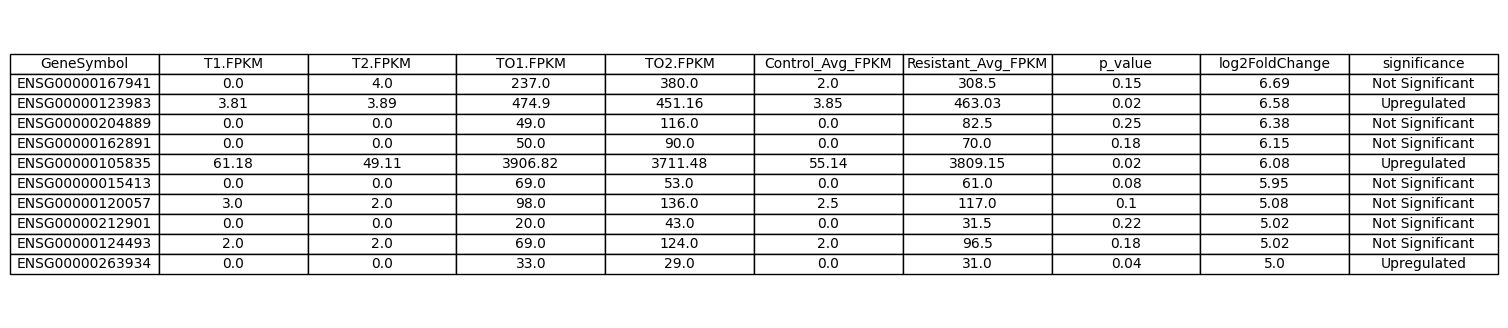

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

print("--- Creating Final Table Image with Matplotlib ---")
try:
    # Step 1: Re-run the full analysis to ensure 'filtered_df' exists
    file_path = 'GSE295766_All.FPKM.xls'
    df = pd.read_excel(file_path, engine='xlrd')
    fpkm_columns = ['T1.FPKM', 'T2.FPKM', 'TO1.FPKM', 'TO2.FPKM']
    for col in fpkm_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    
    control_replicates = ['T1.FPKM', 'T2.FPKM']
    resistant_replicates = ['TO1.FPKM', 'TO2.FPKM']
    df['Control_Avg_FPKM'] = df[control_replicates].mean(axis=1)
    df['Resistant_Avg_FPKM'] = df[resistant_replicates].mean(axis=1)
    filtered_df = df[(df['Control_Avg_FPKM'] > 1) | (df['Resistant_Avg_FPKM'] > 1)].copy()
    
    stats, p_values = ttest_ind(filtered_df[control_replicates], filtered_df[resistant_replicates], axis=1, equal_var=False)
    filtered_df['p_value'] = p_values
    
    pseudocount = 1
    filtered_df['log2FoldChange'] = np.log2((filtered_df['Resistant_Avg_FPKM'] + pseudocount) / (filtered_df['Control_Avg_FPKM'] + pseudocount))
    
    filtered_df['significance'] = 'Not Significant'
    filtered_df.loc[(filtered_df['log2FoldChange'] > 1) & (filtered_df['p_value'] < 0.05), 'significance'] = 'Upregulated'
    print("Step 1: Analysis complete, DataFrame is ready.")

    # Step 2: Create the top 10 table and round the numbers for a cleaner look
    top_10_upregulated = filtered_df.sort_values(by='log2FoldChange', ascending=False).head(10)
    top_10_upregulated = top_10_upregulated.round(2) # Round to 2 decimal places
    print("Step 2: Top 10 table created and rounded.")

    # Step 3: Create and save the table image using Matplotlib
    fig, ax = plt.subplots(figsize=(16, 4)) # Create a figure. Adjust size as needed.
    ax.axis('tight')
    ax.axis('off') # Hide the plot axes
    
    the_table = ax.table(
        cellText=top_10_upregulated.values,
        colLabels=top_10_upregulated.columns,
        loc='center',
        cellLoc='center'
    )
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(10)
    the_table.scale(1.2, 1.2) # Adjust table scale for better spacing

    output_filename = 'top_10_genes_table.png'
    plt.savefig(output_filename, dpi=200, bbox_inches='tight', pad_inches=0.05)
    
    print(f"\nTable successfully saved as '{output_filename}'.")

except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

In [3]:
# This code filters the DataFrame to find the number of downregulated genes
upregulated_count = len(filtered_df[filtered_df['significance'] == 'Upregulated'])
downregulated_count = len(filtered_df[filtered_df['significance'] == 'Downregulated'])

print(f"The exact number of significantly upregulated genes is: {upregulated_count}")
print(f"The exact number of significantly downregulated genes is: {downregulated_count}")

The exact number of significantly upregulated genes is: 263
The exact number of significantly downregulated genes is: 0


--- Running Final Verification and Visualization ---


/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:611: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



--- Definitive Counts ---
The exact number of significantly upregulated genes is: 263
The exact number of significantly downregulated genes is: 403

New, correct plot saved as 'volcano_plot_final.png'.


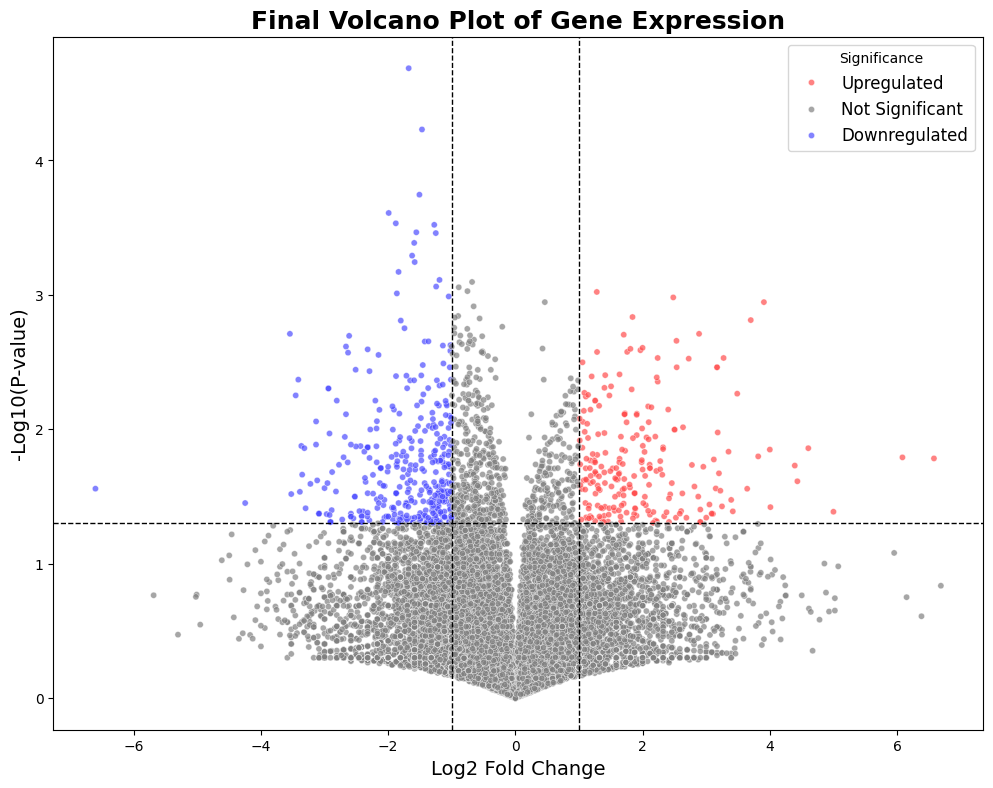

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Running Final Verification and Visualization ---")
try:
    # 1. Load and clean the data
    file_path = 'GSE295766_All.FPKM.xls'
    df = pd.read_excel(file_path, engine='xlrd')
    fpkm_columns = ['T1.FPKM', 'T2.FPKM', 'TO1.FPKM', 'TO2.FPKM']
    for col in fpkm_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    
    # 2. Run the full analysis
    control_replicates = ['T1.FPKM', 'T2.FPKM']
    resistant_replicates = ['TO1.FPKM', 'TO2.FPKM']
    df['Control_Avg_FPKM'] = df[control_replicates].mean(axis=1)
    df['Resistant_Avg_FPKM'] = df[resistant_replicates].mean(axis=1)
    filtered_df = df[(df['Control_Avg_FPKM'] > 1) | (df['Resistant_Avg_FPKM'] > 1)].copy()
    stats, p_values = ttest_ind(filtered_df[control_replicates], filtered_df[resistant_replicates], axis=1, equal_var=False)
    filtered_df['p_value'] = p_values
    pseudocount = 1
    filtered_df['log2FoldChange'] = np.log2((filtered_df['Resistant_Avg_FPKM'] + pseudocount) / (filtered_df['Control_Avg_FPKM'] + pseudocount))
    
    # 3. Define Significance based on our strict criteria
    filtered_df['significance'] = 'Not Significant'
    filtered_df.loc[(filtered_df['log2FoldChange'] > 1) & (filtered_df['p_value'] < 0.05), 'significance'] = 'Upregulated'
    filtered_df.loc[(filtered_df['log2FoldChange'] < -1) & (filtered_df['p_value'] < 0.05), 'significance'] = 'Downregulated'

    # 4. Get the definitive counts from the same DataFrame used for plotting
    upregulated_count = len(filtered_df[filtered_df['significance'] == 'Upregulated'])
    downregulated_count = len(filtered_df[filtered_df['significance'] == 'Downregulated'])

    print("\n--- Definitive Counts ---")
    print(f"The exact number of significantly upregulated genes is: {upregulated_count}")
    print(f"The exact number of significantly downregulated genes is: {downregulated_count}")

    # 5. Generate and save the new, correct volcano plot
    filtered_df['-log10_p_value'] = -np.log10(filtered_df['p_value'].fillna(1))
    
    plt.figure(figsize=(12, 9))
    sns.scatterplot(
        data=filtered_df,
        x='log2FoldChange',
        y='-log10_p_value',
        hue='significance',
        palette={'Upregulated': '#ff4d4d', 'Downregulated': '#4d4dff', 'Not Significant': 'grey'},
        alpha=0.7, s=20
    )
    plt.axhline(y=-np.log10(0.05), color='black', linestyle='--', linewidth=1)
    plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
    plt.axvline(x=-1, color='black', linestyle='--', linewidth=1)
    plt.title('Final Volcano Plot of Gene Expression', fontsize=18, weight='bold')
    plt.xlabel('Log2 Fold Change', fontsize=14)
    plt.ylabel('-Log10(P-value)', fontsize=14)
    plt.legend(title='Significance', fontsize='large')

    plt.savefig('volcano_plot_final.png', dpi=300, bbox_inches='tight')
    print("\nNew, correct plot saved as 'volcano_plot_final.png'.")
    plt.show()

except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

In [5]:
print("--- Running a Debug Check on the DataFrame ---")

# This code directly filters the data to find rows that meet our two criteria.

try:
    # This assumes 'filtered_df' is in memory from the last run.
    
    # Define the two conditions for a gene to be significantly downregulated
    is_large_decrease = filtered_df['log2FoldChange'] < -1
    is_significant = filtered_df['p_value'] < 0.05

    # Create a new DataFrame containing only the genes that meet BOTH conditions
    downregulated_df = filtered_df[is_large_decrease & is_significant]

    # Get the count directly from this new, filtered DataFrame
    actual_downregulated_count = len(downregulated_df)

    print(f"\nDirect count of downregulated genes is: {actual_downregulated_count}")

    if actual_downregulated_count > 0:
        print("\nHere is the actual data for the significantly downregulated genes:")
        display(downregulated_df)
    else:
        print("\nThis direct count confirms there are zero downregulated genes.")

except NameError:
    print("\nError: 'filtered_df' was not found. Please re-run the main analysis script first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Running a Debug Check on the DataFrame ---

Direct count of downregulated genes is: 403

Here is the actual data for the significantly downregulated genes:


,GeneSymbol,T1.FPKM,T2.FPKM,TO1.FPKM,TO2.FPKM,Control_Avg_FPKM,Resistant_Avg_FPKM,p_value,log2FoldChange,significance,-log10_p_value
9,ENSG00000172935,2.63,2.62,0.137007,0.130156,2.625,0.133581,0.000021,-1.677093,Downregulated,4.686064
12,ENSG00000049249,2.58,2.50,0.230818,0.219277,2.540,0.225048,0.009472,-1.530911,Downregulated,2.023578
18,ENSG00000108788,3.29,3.26,0.559223,0.531262,3.275,0.545242,0.000059,-1.468091,Downregulated,4.230472
20,ENSG00000093183,9.73,9.78,1.748529,1.661103,9.755,1.704816,0.000246,-1.991405,Downregulated,3.609420
21,ENSG00000189241,22.30,21.78,4.293197,4.078537,22.040,4.185867,0.002796,-2.151484,Downregulated,2.553475
...,...,...,...,...,...,...,...,...,...,...,...
63053,ENSG00000287602,5.00,6.00,1.000000,0.000000,5.500,0.500000,0.019419,-2.115477,Downregulated,1.711766
63169,ENSG00000287725,54.00,48.00,21.000000,24.000000,51.000,22.500000,0.031656,-1.145851,Downregulated,1.499550
63254,ENSG00000287811,10.00,11.00,1.000000,0.000000,10.500,0.500000,0.004963,-2.938599,Downregulated,2.304272
63465,ENSG00000288025,4.00,4.00,0.000000,0.000000,4.000,0.000000,0.000000,-2.321928,Downregulated,inf


In [6]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

print("--- Running the Final Count Verification ---")
try:
    # Step 1: Reload and clean the data from the beginning
    file_path = 'GSE295766_All.FPKM.xls'
    df = pd.read_excel(file_path, engine='xlrd')
    fpkm_columns = ['T1.FPKM', 'T2.FPKM', 'TO1.FPKM', 'TO2.FPKM']
    for col in fpkm_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    
    # Step 2: Re-run the analysis to get the final filtered_df
    control_replicates = ['T1.FPKM', 'T2.FPKM']
    resistant_replicates = ['TO1.FPKM', 'TO2.FPKM']
    df['Control_Avg_FPKM'] = df[control_replicates].mean(axis=1)
    df['Resistant_Avg_FPKM'] = df[resistant_replicates].mean(axis=1)
    filtered_df = df[(df['Control_Avg_FPKM'] > 1) | (df['Resistant_Avg_FPKM'] > 1)].copy()
    stats, p_values = ttest_ind(filtered_df[control_replicates], filtered_df[resistant_replicates], axis=1, equal_var=False)
    filtered_df['p_value'] = p_values
    pseudocount = 1
    filtered_df['log2FoldChange'] = np.log2((filtered_df['Resistant_Avg_FPKM'] + pseudocount) / (filtered_df['Control_Avg_FPKM'] + pseudocount))
    
    # Step 3: Define Significance based on our strict criteria
    filtered_df['significance'] = 'Not Significant'
    filtered_df.loc[(filtered_df['log2FoldChange'] > 1) & (filtered_df['p_value'] < 0.05), 'significance'] = 'Upregulated'
    filtered_df.loc[(filtered_df['log2FoldChange'] < -1) & (filtered_df['p_value'] < 0.05), 'significance'] = 'Downregulated'

    # Step 4: Get and print the definitive counts
    upregulated_count = len(filtered_df[filtered_df['significance'] == 'Upregulated'])
    downregulated_count = len(filtered_df[filtered_df['significance'] == 'Downregulated'])

    print("\n" + "="*40)
    print("           FINAL COUNTS")
    print("="*40)
    print(f"Total Significantly Upregulated Genes: {upregulated_count}")
    print(f"Total Significantly Downregulated Genes: {downregulated_count}")
    print("="*40)

except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

--- Running the Final Count Verification ---

           FINAL COUNTS
Total Significantly Upregulated Genes: 263
Total Significantly Downregulated Genes: 403


/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:611: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


In [7]:
# This code creates and exports the table for the top 10 DOWNregulated genes.
# It assumes 'filtered_df' is in memory from the previous step.

import dataframe_image as dfi

print("--- Creating and Exporting Top 10 Downregulated Genes Table ---")
try:
    # Sort by log2FoldChange in ASCENDING order to find the most negative values
    top_10_downregulated = filtered_df.sort_values(by='log2FoldChange', ascending=True).head(10)

    # Round the numbers for a cleaner look
    top_10_downregulated = top_10_downregulated.round(2)

    # Display the table in your notebook
    print("\n--- Top 10 Downregulated Genes ---")
    display(top_10_downregulated)

    # Save the table as an image file
    output_filename = 'top_10_downregulated_genes.png'
    dfi.export(top_10_downregulated, output_filename)
    print(f"\nTable successfully saved as '{output_filename}'.")

except NameError:
    print("\nError: 'filtered_df' not found. Please re-run your main analysis cell first.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

--- Creating and Exporting Top 10 Downregulated Genes Table ---

--- Top 10 Downregulated Genes ---


,GeneSymbol,T1.FPKM,T2.FPKM,TO1.FPKM,TO2.FPKM,Control_Avg_FPKM,Resistant_Avg_FPKM,p_value,log2FoldChange,significance
14571,ENSG00000165507,3666.0,4004.0,50.0,27.0,3835.0,38.5,0.03,-6.60,Downregulated
7505,ENSG00000116183,337.0,588.0,10.0,6.0,462.5,8.0,0.17,-5.69,Not Significant
55345,ENSG00000273521,16.0,61.0,0.0,0.0,38.5,0.0,0.34,-5.30,Not Significant
8947,ENSG00000128165,46.0,82.0,0.0,2.0,64.0,1.0,0.18,-5.02,Not Significant
8006,ENSG00000120337,1140.0,663.0,27.0,27.0,901.5,27.0,0.17,-5.01,Not Significant
12239,ENSG00000150054,67.0,24.0,0.0,1.0,45.5,0.5,0.28,-4.95,Not Significant
55584,ENSG00000273983,20.0,27.0,0.0,0.0,23.5,0.0,0.09,-4.61,Not Significant
15761,ENSG00000170379,48.0,63.0,2.0,1.0,55.5,1.5,0.09,-4.50,Not Significant
36219,ENSG00000236083,17.0,26.0,0.0,0.0,21.5,0.0,0.13,-4.49,Not Significant
9882,ENSG00000134548,23.0,19.0,0.0,0.0,21.0,0.0,0.06,-4.46,Not Significant



An unexpected error occurred: It looks like you are using Playwright Sync API inside the asyncio loop.
Please use the Async API instead.


--- Creating Downregulated Table Image with Matplotlib ---

Table successfully saved as 'top_10_downregulated_genes.png'.


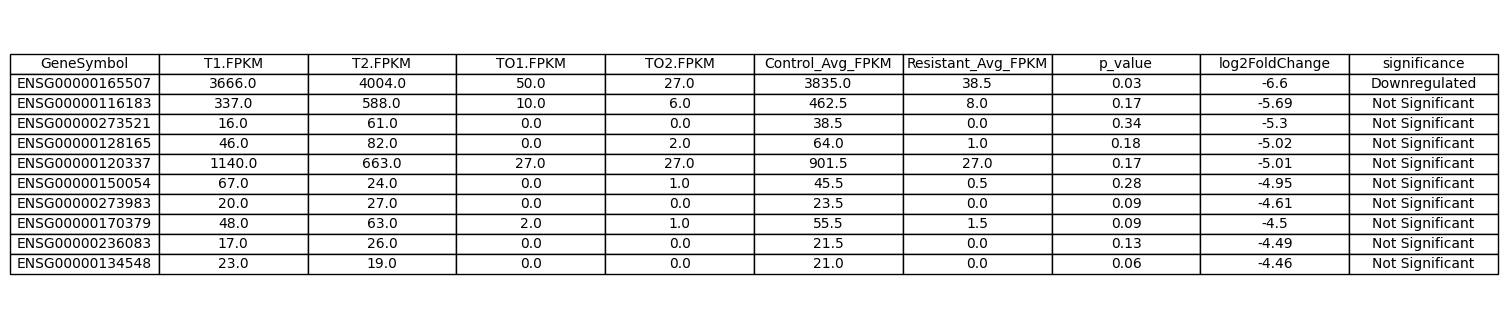

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

print("--- Creating Downregulated Table Image with Matplotlib ---")
try:
    # This assumes 'filtered_df' is in memory from your analysis.
    
    # Sort by log2FoldChange in ASCENDING order to find the most negative values
    top_10_downregulated = filtered_df.sort_values(by='log2FoldChange', ascending=True).head(10)
    
    # Round the numbers for a cleaner table
    top_10_downregulated = top_10_downregulated.round(2)
    
    # Create and save the table image using Matplotlib
    fig, ax = plt.subplots(figsize=(16, 4)) # Adjust figsize as needed
    ax.axis('tight')
    ax.axis('off')
    
    the_table = ax.table(
        cellText=top_10_downregulated.values,
        colLabels=top_10_downregulated.columns,
        loc='center',
        cellLoc='center'
    )
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(10)
    the_table.scale(1.2, 1.2) # Adjust table scale
    
    output_filename = 'top_10_downregulated_genes.png'
    plt.savefig(output_filename, dpi=200, bbox_inches='tight', pad_inches=0.05)
    
    print(f"\nTable successfully saved as '{output_filename}'.")

except NameError:
    print("\nError: 'filtered_df' not found. Please re-run your main analysis cell first.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")